# ROAD INCIDENTS: A EXPLORATORY ANALYSIS OF ROAD FATALITIES IN THE USA DURING THE YEAR 2020.

Welcome to team Road Incidents explotory analysis into the road fatalities which have occoured accross all 50 States in the US during 2020. Many variables will be studied against road fatalities e.g. weather condition, age, and speed limit to name a few, to find out what else will be explored, you will have to keep reading!

<b>The data used for this project's exploratory data analysis has been sourced from:<b>

National Highway Traffic Safety Administration, the data is available to the public through two forms:
- API (https://crashviewer.nhtsa.dot.gov/CrashAPI)
- All NHTSA records are also available to download in CSV form at (https://www.nhtsa.gov/file-downloadsp=nhtsa/downloads/FARS/2021/National/).

The data source contains US national records about road fatalities and numerous variables associated with each incident. 

## Data cleansing of the National Highway Traffic Safety Administration Data:

In [1]:
# Imports dependencies.
import pandas as pd
import numpy as np
import scipy as st
import scipy.stats as st
from scipy.stats import linregress 
import matplotlib.pyplot as plt
import requests
import json
import csv 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Imports CSV containing road accident data from the year 2020. 
csv_path = "source_data/Accidents_2020_2020.csv"
Accidents_2020 = pd.read_csv(csv_path)
Accidents_2020.head()

,caseyear,state,st_case,statename,ve_total,ve_forms,pvh_invl,peds,pernotmvit,permvit,...,cf2name,cf3,cf3name,fatals,drunk_dr,age,speed_limit,race,vehicle_make,sex
0,2020,1,10001,Alabama,1,1,0,0,0,4,...,NaN,NaN,NaN,3,1,24.0,45.0,Black or African American,Lexus,Female
1,2020,1,10002,Alabama,4,4,0,0,0,6,...,NaN,NaN,NaN,1,0,40.0,35.0,Not a Fatality (not Applicable),Chevrolet,Female
2,2020,1,10003,Alabama,2,2,0,0,0,2,...,NaN,NaN,NaN,1,0,34.0,65.0,White,Toyota,Male
3,2020,1,10004,Alabama,1,1,0,0,0,5,...,NaN,NaN,NaN,1,0,17.0,35.0,Not a Fatality (not Applicable),Hyundai,Male
4,2020,1,10005,Alabama,1,1,0,0,0,1,...,NaN,NaN,NaN,1,0,47.0,45.0,White,GMC,Male


In [3]:
# The output DataFrame has lots of redundant columns, the below create a new DataFrames with the columns of focus.
Cleaned_df = Accidents_2020[["caseyear", "st_case","statename","persons", "countyname", "monthname", 
                                  "day_week", "hour", "rur_urbname", "routename", "latitude", "longitud", 
                                  "harm_evname","lgt_condname", "weathername", "fatals", "drunk_dr", "age", "speed_limit", "race", "vehicle_make", "sex"]]
Cleaned_df.head()

,caseyear,st_case,statename,persons,countyname,monthname,day_week,hour,rur_urbname,routename,...,harm_evname,lgt_condname,weathername,fatals,drunk_dr,age,speed_limit,race,vehicle_make,sex
0,2020,10001,Alabama,4,ELMORE (51),January,4,2,Rural,County Road,...,Tree (Standing Only),Dark - Not Lighted,Clear,3,1,24.0,45.0,Black or African American,Lexus,Female
1,2020,10002,Alabama,6,JEFFERSON (73),January,5,17,Urban,Local Street - Municipality,...,Motor Vehicle In-Transport,Dark - Lighted,Rain,1,0,40.0,35.0,Not a Fatality (not Applicable),Chevrolet,Female
2,2020,10003,Alabama,2,SHELBY (117),January,5,14,Rural,State Highway,...,Ditch,Daylight,Rain,1,0,34.0,65.0,White,Toyota,Male
3,2020,10004,Alabama,5,CALHOUN (15),January,6,15,Rural,County Road,...,Tree (Standing Only),Daylight,Cloudy,1,0,17.0,35.0,Not a Fatality (not Applicable),Hyundai,Male
4,2020,10005,Alabama,1,COOSA (37),January,7,0,Rural,County Road,...,Tree (Standing Only),Dark - Not Lighted,Rain,1,0,47.0,45.0,White,GMC,Male


In [4]:
# Dropping NaN rows. 
Cleaned_df = Cleaned_df.dropna(how="any")
Cleaned_df.head()

,caseyear,st_case,statename,persons,countyname,monthname,day_week,hour,rur_urbname,routename,...,harm_evname,lgt_condname,weathername,fatals,drunk_dr,age,speed_limit,race,vehicle_make,sex
0,2020,10001,Alabama,4,ELMORE (51),January,4,2,Rural,County Road,...,Tree (Standing Only),Dark - Not Lighted,Clear,3,1,24.0,45.0,Black or African American,Lexus,Female
1,2020,10002,Alabama,6,JEFFERSON (73),January,5,17,Urban,Local Street - Municipality,...,Motor Vehicle In-Transport,Dark - Lighted,Rain,1,0,40.0,35.0,Not a Fatality (not Applicable),Chevrolet,Female
2,2020,10003,Alabama,2,SHELBY (117),January,5,14,Rural,State Highway,...,Ditch,Daylight,Rain,1,0,34.0,65.0,White,Toyota,Male
3,2020,10004,Alabama,5,CALHOUN (15),January,6,15,Rural,County Road,...,Tree (Standing Only),Daylight,Cloudy,1,0,17.0,35.0,Not a Fatality (not Applicable),Hyundai,Male
4,2020,10005,Alabama,1,COOSA (37),January,7,0,Rural,County Road,...,Tree (Standing Only),Dark - Not Lighted,Rain,1,0,47.0,45.0,White,GMC,Male


In [5]:
# Checking the data types of the columns in the Cleaned_df. 
Cleaned_df.dtypes

caseyear          int64
st_case           int64
statename        object
persons           int64
countyname       object
monthname        object
day_week          int64
hour              int64
rur_urbname      object
routename        object
latitude        float64
longitud        float64
harm_evname      object
lgt_condname     object
weathername      object
fatals            int64
drunk_dr          int64
age             float64
speed_limit     float64
race             object
vehicle_make     object
sex              object
dtype: object

In [6]:
# Converting the age and speed limit columns from float to integer.
Cleaned_df = Cleaned_df.astype({"age":"int", 
                                 "speed_limit":"int"})
Cleaned_df.head()

,caseyear,st_case,statename,persons,countyname,monthname,day_week,hour,rur_urbname,routename,...,harm_evname,lgt_condname,weathername,fatals,drunk_dr,age,speed_limit,race,vehicle_make,sex
0,2020,10001,Alabama,4,ELMORE (51),January,4,2,Rural,County Road,...,Tree (Standing Only),Dark - Not Lighted,Clear,3,1,24,45,Black or African American,Lexus,Female
1,2020,10002,Alabama,6,JEFFERSON (73),January,5,17,Urban,Local Street - Municipality,...,Motor Vehicle In-Transport,Dark - Lighted,Rain,1,0,40,35,Not a Fatality (not Applicable),Chevrolet,Female
2,2020,10003,Alabama,2,SHELBY (117),January,5,14,Rural,State Highway,...,Ditch,Daylight,Rain,1,0,34,65,White,Toyota,Male
3,2020,10004,Alabama,5,CALHOUN (15),January,6,15,Rural,County Road,...,Tree (Standing Only),Daylight,Cloudy,1,0,17,35,Not a Fatality (not Applicable),Hyundai,Male
4,2020,10005,Alabama,1,COOSA (37),January,7,0,Rural,County Road,...,Tree (Standing Only),Dark - Not Lighted,Rain,1,0,47,45,White,GMC,Male


In [7]:
# Renaming the columns in Cleaned_df to be self-explanatory.
Cleaned_df = Cleaned_df.rename(columns={"caseyear":"Year", "st_case": "Case_ID","statename":"State","persons": "Person_Count", 
                                                 "countyname":"County", "monthname": "Month", "day_week":"Day_Name", 
                                                 "hour":"Hour", "rur_urbname": "Rural_Urban", "routename":"Route_Name", 
                                                 "latitude": "Latitude", "longitud":"Longitude", "harm_evname": "Harm_Event",
                                                 "lgt_condname":"Visibility", "weathername":"Weather_Condition", "fatals":"Fatality_Count", "drunk_dr":"Drunk_Driver_Count"
                                                  , "age":"Age", "speed_limit":"Speed_Limit", "race":"Race", "vehicle_make": "Vehicle_Make", "sex":"Sex"})
Cleaned_df.head()

,Year,Case_ID,State,Person_Count,County,Month,Day_Name,Hour,Rural_Urban,Route_Name,...,Harm_Event,Visibility,Weather_Condition,Fatality_Count,Drunk_Driver_Count,Age,Speed_Limit,Race,Vehicle_Make,Sex
0,2020,10001,Alabama,4,ELMORE (51),January,4,2,Rural,County Road,...,Tree (Standing Only),Dark - Not Lighted,Clear,3,1,24,45,Black or African American,Lexus,Female
1,2020,10002,Alabama,6,JEFFERSON (73),January,5,17,Urban,Local Street - Municipality,...,Motor Vehicle In-Transport,Dark - Lighted,Rain,1,0,40,35,Not a Fatality (not Applicable),Chevrolet,Female
2,2020,10003,Alabama,2,SHELBY (117),January,5,14,Rural,State Highway,...,Ditch,Daylight,Rain,1,0,34,65,White,Toyota,Male
3,2020,10004,Alabama,5,CALHOUN (15),January,6,15,Rural,County Road,...,Tree (Standing Only),Daylight,Cloudy,1,0,17,35,Not a Fatality (not Applicable),Hyundai,Male
4,2020,10005,Alabama,1,COOSA (37),January,7,0,Rural,County Road,...,Tree (Standing Only),Dark - Not Lighted,Rain,1,0,47,45,White,GMC,Male


In [8]:
# Cleaned_df summary description.
Cleaned_df.describe().applymap('{:,.0f}'.format)

,Year,Case_ID,Person_Count,Day_Name,Hour,Latitude,Longitude,Fatality_Count,Drunk_Driver_Count,Age,Speed_Limit
count,"34,958","34,958","34,958","34,958","34,958","34,958","34,958","34,958","34,958","34,958","34,958"
mean,"2,020","271,691",2,4,14,37,-88,1,0,51,50
std,0,"163,768",2,2,10,6,69,0,0,88,17
min,"2,020","10,001",0,1,0,19,-165,1,0,0,0
25%,"2,020","121,933",1,2,7,33,-98,1,0,27,40
50%,"2,020","260,896",2,4,15,36,-88,1,0,40,50
75%,"2,020","420,460",3,6,19,40,-82,1,1,58,55
max,"2,020","560,104",61,7,99,100,"1,000",8,3,999,99


In [9]:
# Cleaned_df info.
Cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34958 entries, 0 to 36152
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                34958 non-null  int64  
 1   Case_ID             34958 non-null  int64  
 2   State               34958 non-null  object 
 3   Person_Count        34958 non-null  int64  
 4   County              34958 non-null  object 
 5   Month               34958 non-null  object 
 6   Day_Name            34958 non-null  int64  
 7   Hour                34958 non-null  int64  
 8   Rural_Urban         34958 non-null  object 
 9   Route_Name          34958 non-null  object 
 10  Latitude            34958 non-null  float64
 11  Longitude           34958 non-null  float64
 12  Harm_Event          34958 non-null  object 
 13  Visibility          34958 non-null  object 
 14  Weather_Condition   34958 non-null  object 
 15  Fatality_Count      34958 non-null  int64  
 16  Drun

## API Consideration

The dataset cleaned above is also available through an API retrieval. 

However, this study's focus is on all states accross the US which means the returned API response is excessivley large for all the variables being considered. Therefore, it was more sensible to download the data into a CSV rather than having to communicate with the API and then format it into a DataFrame. 

However, the variables available in the API have been included below to view all which were available to us for this study:

In [10]:
# Retrieves the JSON file containing the variables from the data source. 
url = "https://crashviewer.nhtsa.dot.gov/CrashAPI"
query = "/definitions/GetVariables?dataYear=2010&format=json"

response = requests.get(url + query)
response = response.json()

print(json.dumps(response, indent=4, sort_keys=True))

{
    "Count": 341,
    "Message": "Results returned successfully",
    "Results": [
        [
            {
                "DATATYPE": "smallint",
                "VARIABLENAME": "STATE"
            },
            {
                "DATATYPE": "int",
                "VARIABLENAME": "ST_CASE"
            },
            {
                "DATATYPE": "int",
                "VARIABLENAME": "EVENTNUM"
            },
            {
                "DATATYPE": "int",
                "VARIABLENAME": "VE_FORMS"
            },
            {
                "DATATYPE": "smallint",
                "VARIABLENAME": "VE_TOTAL"
            },
            {
                "DATATYPE": "smallint",
                "VARIABLENAME": "VEH_NO"
            },
            {
                "DATATYPE": "int",
                "VARIABLENAME": "DRIMPAIR"
            },
            {
                "DATATYPE": "int",
                "VARIABLENAME": "MDRDSTRD"
            },
            {
                "DATATYPE"

In [11]:
# Printing the variables available using the API in a more readable format. 
for variable in response["Results"][0]:
    print(f'Variable name: {variable["VARIABLENAME"]}')
    print('---------------------------') 

Variable name: STATE
---------------------------
Variable name: ST_CASE
---------------------------
Variable name: EVENTNUM
---------------------------
Variable name: VE_FORMS
---------------------------
Variable name: VE_TOTAL
---------------------------
Variable name: VEH_NO
---------------------------
Variable name: DRIMPAIR
---------------------------
Variable name: MDRDSTRD
---------------------------
Variable name: MDRMANAV
---------------------------
Variable name: MFACTOR
---------------------------
Variable name: MVIOLATN
---------------------------
Variable name: MVISOBSC
---------------------------
Variable name: PER_NO
---------------------------
Variable name: PVE_FORMS
---------------------------
Variable name: VE_FORMS
---------------------------
Variable name: VEH_NO
---------------------------
Variable name: VEVENTNUM
---------------------------
Variable name: VNUMBER1
---------------------------
Variable name: AOI1
---------------------------
Variable name: MPR_ACT
--

*For further exploration of the above variables, you may wish to refer to the below. 
FARS Analytical Users Manual: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/813417*

<b>Now that the data cleanse has concluded, this study will explore the following topic areas:<b>

1) A map distribution of road accidents.    
    
2) State Vs. Fatality Count.
    
3) Age Vs. Fatality Count.
    
4) Weather Condition Vs. Fatality Count.
    
5) Route Type Vs. Fatality Count.
    
6) Time of Day (Hour) Vs. Fatality Count.
    
7) Harm Event Vs. Fatality Count.
    
8) Speed Limit Vs. Fatality Count.
    
9) Visability Vs. Fatality Count.
    
10) Further Insights.

## Harm Event vs Fatality Count

Harm Event in the this study is defined as the first injury/ damage which has occoured as a result of the road incident being observed. 

The different types of harm events will be analysed against fatality count. 

In [12]:
# Creating a separate DataFrame to visualise the various harm events and the number of fatalities which occured in each case.
# Sex will also be included to help deduce additional insights during analysis. 
harm_event_df = Cleaned_df[["Harm_Event", "Sex", "Fatality_Count"]]
harm_event_df.reset_index()
harm_event_df.head()

,Harm_Event,Sex,Fatality_Count
0,Tree (Standing Only),Female,3
1,Motor Vehicle In-Transport,Female,1
2,Ditch,Male,1
3,Tree (Standing Only),Male,1
4,Tree (Standing Only),Male,1


In [13]:
# There are many types of harm events, this study will focus on the four with the highest frequency.
harm_event_df["Harm_Event"].value_counts()

Motor Vehicle In-Transport                                                                                                               13332
Pedestrian                                                                                                                                5845
Rollover/Overturn                                                                                                                         2628
Tree (Standing Only)                                                                                                                      2471
Curb                                                                                                                                      1224
Ditch                                                                                                                                     1018
Pedalcyclist                                                                                                                               911

In [14]:
# Narrowing down the DataFrame to only include records relating to the four harm event types of focus. 

harm_event_df = harm_event_df.loc[(harm_event_df["Harm_Event"]=="Motor Vehicle In-Transport") | 
                                  (harm_event_df["Harm_Event"]=="Pedestrian") |
                                  (harm_event_df["Harm_Event"]=="Rollover/Overturn") |
                                  (harm_event_df["Harm_Event"]=="Tree (Standing Only)"), :]

# Replacing values names to be more comprehensible. 

harm_event_df = harm_event_df.replace({"Motor Vehicle In-Transport":"Moving Vehicle",
                                       "Rollover/Overturn":"Overturned Vechicle",
                                       "Tree (Standing Only)":"Standing Tree"
                                       })

harm_event_df["Harm_Event"].unique()

array(['Standing Tree', 'Moving Vehicle', 'Pedestrian',
       'Overturned Vechicle'], dtype=object)

In [15]:
# Narrowing down the DataFrame for the 'known' sex types (this dataset does not contain information about non-binary gender types). 

harm_event_df = harm_event_df.loc[(harm_event_df["Sex"]=="Male") | 
                                  (harm_event_df["Sex"]=="Female"), :]

harm_event_df["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
# Groups the harm_event_df by the harm event and then by sex. 
harm_event_df = harm_event_df.groupby(["Harm_Event", "Sex"]).sum()
harm_event_df = harm_event_df.reset_index()
harm_event_df

,Harm_Event,Sex,Fatality_Count
0,Moving Vehicle,Female,3648
1,Moving Vehicle,Male,11478
2,Overturned Vechicle,Female,647
3,Overturned Vechicle,Male,2104
4,Pedestrian,Female,1370
5,Pedestrian,Male,4482
6,Standing Tree,Female,638
7,Standing Tree,Male,2038


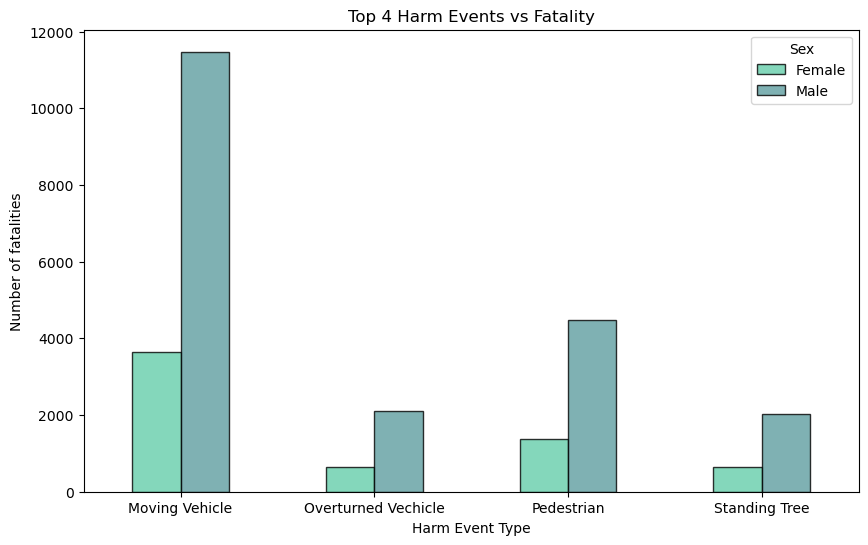

In [17]:
# Bar plot showing the top 4 harm_events identified vs fatality count. 
harm_event_df.pivot(index="Harm_Event", columns="Sex", values="Fatality_Count").plot(kind = "bar", 
                                                                                     rot = 0, figsize=(10,6), 
                                                                                     color =('mediumaquamarine', 'cadetblue'), 
                                                                                     title = "Top 4 Harm Events vs Fatality",
                                                                                     xlabel = "Harm Event Type", 
                                                                                     ylabel = "Number of fatalities", 
                                                                                     edgecolor="black",
                                                                                     alpha=0.8
                                                                                    )
plt.show()

<b> Harm Event Vs. Fatality Analysis: <b>
    
The event which caused harm to the individuals involved in fatal road incident was a moving vehicle, from this it may inferred that most fatal road incidents were involving two or more vehicles rather than a driver colliding with a non motor object such as a standing tree or even (unfortunateley) a pedestrian.
    
When observing the genders who were involved in a fatal road accidents of each harm type, it is apparently clear that more males had died during these road accidents across all the observed harm types, however, although males appear to be more likely to get into a road accident, the reasoning would need to be explored further as this could be related to the ratio of male: female drivers in the US rather than actual behavioral traits.  

## Speed limit vs Fatality Count

Speed limit in the this study takes on the meaning of the maximum speed limit of the road where the road incident took place. 

The fatalities which occoured on roads of varying speed limits will be analysed. 

In [18]:
# Creating a separate DataFrame to visualise the the number of fatalities which occoured at each of the speed limits included 
# in this road incident dataset. 
speed_limit_df = Cleaned_df[["Speed_Limit", "Fatality_Count"]]
speed_limit_df.reset_index()
speed_limit_df

,Speed_Limit,Fatality_Count
0,45,3
1,35,1
2,65,1
3,35,1
4,45,1
...,...,...
36148,70,2
36149,75,1
36150,40,1
36151,70,1


<b> Before fatality counts are observed against speed limits,  some exploration of the speed limits at each road incident will be inspected:<b> 

In [19]:
# Calculating measures of central tendancy for the speed limits in this dataset.

mean_numpy = round(np.mean(speed_limit_df["Speed_Limit"]),2)
print(f"\n The mean speed limit that road accidents occured on was {mean_numpy} MPH")

sd_numpy = round(np.std(speed_limit_df["Speed_Limit"], ddof=0), 2)
print(f"\n The population standard deviation is {sd_numpy} MPH, this is how much the speed limits of the group vary from the population's mean \n speed limit)")

median_numpy = round(np.median(speed_limit_df["Speed_Limit"]),2)
print(f"\n The median speed limit that road accidents occured on was {median_numpy} MPH")

mode_scipy = st.mode(speed_limit_df["Speed_Limit"], keepdims=False)
print(f"\n The modal speed limit of road accidents occured on roads with a speed limit of {mode_scipy[0]} MPH")


 The mean speed limit that road accidents occured on was 50.23 MPH

 The population standard deviation is 17.04 MPH, this is how much the speed limits of the group vary from the population's mean 
 speed limit)

 The median speed limit that road accidents occured on was 50.0 MPH

 The modal speed limit of road accidents occured on roads with a speed limit of 55 MPH


As a initial perspective, it may be inferred that road accidents are most likely to occur at approx 50 MPH. Both the mean and median are good representations of this which suggest that the speed limit data is normally distributed. However, this can now be further explored:

NormaltestResult(statistic=1.8031863921382156, pvalue=0.40592243027550534)
NormaltestResult(statistic=3.630509182315853, pvalue=0.16279645657540223)


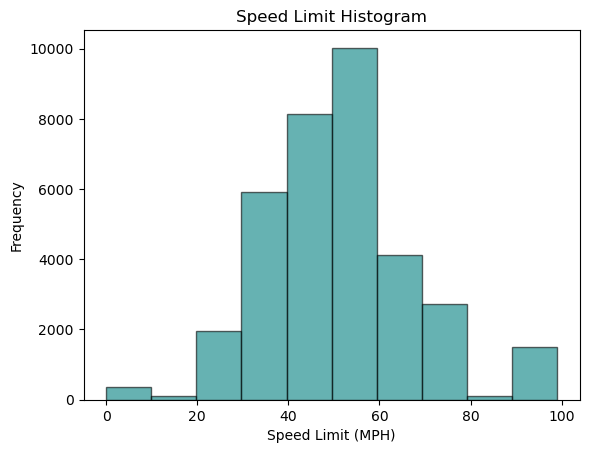

In [20]:
# Characterises the speed limit data using a histogram and a normal test.
plt.hist(speed_limit_df["Speed_Limit"], color="teal", edgecolor="black", alpha = 0.6)

plt.title("Speed Limit Histogram")
plt.xlabel("Speed Limit (MPH)")
plt.ylabel("Frequency")


# Determines if the speed limits that road incidents were recorded for are normally distributed using a small and large sample size. 
print(st.normaltest(speed_limit_df["Speed_Limit"].sample(20)))
print(st.normaltest(speed_limit_df["Speed_Limit"].sample(100)))

plt.show()


The population of speed limits in the dataset appear to be normally distibuted as it follows a bell curve structure. Furthermore, the higher the sample size of the speed limits taken, the higher the normal test statistic. 

As the whole speed limit population will be used in this study, it can be deemed as reliable when accepting or rejecting the null hypothesis.

In [21]:
# Calculating the 68-95-99.7 rule using the standard deviation:

print(f"\n Roughly 68% of the recorded road incidents occoured between {round(mean_numpy-sd_numpy, 3)}MPH and {round(mean_numpy+sd_numpy, 3)}MPH")

print(f"\n Roughly 95% of the recorded road incidents occoured between {round(mean_numpy-2*sd_numpy, 3)}MPH and {round(mean_numpy+2*sd_numpy, 3)}MPH")

print(f"\n Roughly 99.7% of the recorded road incidents occoured between {round(mean_numpy-3*sd_numpy, 3)}MPH and {round(mean_numpy+3*sd_numpy, 3)}MPH")


 Roughly 68% of the recorded road incidents occoured between 33.19MPH and 67.27MPH

 Roughly 95% of the recorded road incidents occoured between 16.15MPH and 84.31MPH

 Roughly 99.7% of the recorded road incidents occoured between -0.89MPH and 101.35MPH


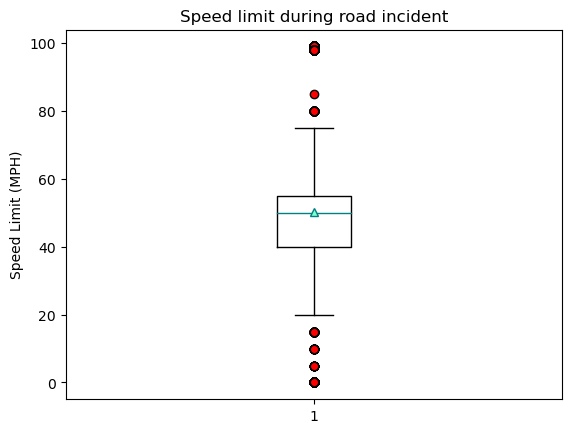

In [22]:
# Sets out box plot to view the distirbution of the speed limit mean/ median in relation to the speed limit data population. 
fig1, ax1 = plt.subplots()
ax1.set_title("Speed limit during road incident")
ax1.set_ylabel("Speed Limit (MPH)")

flierprops = dict(marker='o', markerfacecolor='r', markersize=6)
medianprops = dict(color = "teal")
meanprops = dict(markerfacecolor = "aquamarine", markeredgecolor="teal")


ax1.boxplot(speed_limit_df["Speed_Limit"],
                           showmeans=True,
                           flierprops = flierprops,
                           medianprops = medianprops, 
                           meanprops = meanprops)
plt.show()

In [23]:
 # Quartile calculations
quartiles = speed_limit_df["Speed_Limit"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of speed limit is: {lowerq}")
print(f"The upper quartile of speed limit is: {upperq}")
print(f"The interquartile range of speed limit is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of speed limit is: 40.0
The upper quartile of speed limit is: 55.0
The interquartile range of speed limit is: 15.0
Values below 17.5 could be outliers.
Values above 77.5 could be outliers.


<b>Now that the speed limit data population has been thoughly observed, fatality will now also be introduced.<b> 

In [24]:
# Grouping the speed limit DataFrame. 
speed_limit_df = speed_limit_df.groupby(["Speed_Limit"]).sum()
speed_limit_df.reset_index(inplace=True)

speed_limit_df

,Speed_Limit,Fatality_Count
0,0,361
1,5,11
2,10,26
3,15,76
4,20,124
5,25,1942
6,30,1974
7,35,4270
8,40,2912
9,45,5803


 The Pearson's correlation coefficient is: 0.10179
 The r-value is: 0.01036


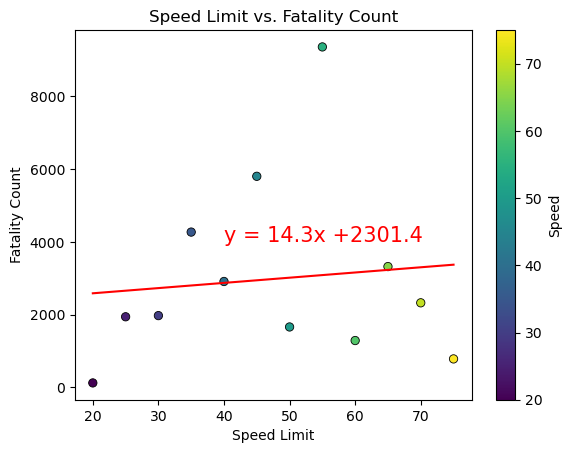

In [25]:
#Removing potential outliers. 
speed_limit_reduced = speed_limit_df.loc[(speed_limit_df["Speed_Limit"]>= 17.5) & 
                                  (speed_limit_df["Speed_Limit"]<= 77.5) , :]

# Scatter plot of Speed Limit Vs. Fatality Count.
x_values = speed_limit_reduced["Speed_Limit"]
y_values = speed_limit_reduced["Fatality_Count"]
plt.scatter(x_values ,y_values, marker="o", c=speed_limit_reduced["Speed_Limit"], edgecolor="black", linewidth=0.6)
clb = plt.colorbar()
clb.set_label("Speed")

# Headings. 
plt.title("Speed Limit vs. Fatality Count")
plt.xlabel("Speed Limit")
plt.ylabel("Fatality Count")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,4000), fontsize=15, color="red")

correlation = st.pearsonr(x_values, y_values)
print(f" The Pearson's correlation coefficient is: {round(correlation[0],5)}")
print(f" The r-value is: {round(rvalue**2, 5)}")
plt.show()

<b> Speed Limit Vs. Fatality Analysis (Part 1): <b>
    
There is not a significant correlation between speed limit and fatality count, this is indicated by Pearson's correlation coefficient value of 0.10179 (5.d.p); any positive value below 0.3 is considered a very weak correlation. An increase of one MPH in the speed limit corresponds to a increase of 14 additional fatalities which is very insignificant when observing the scale of the fatality counts as this is nationwide. 

The equation of a line calculated is: y = 14.3x + 2301.4, this equation may help to regress the values of fatality counts at speed limits not included in the chart. For example, at a speed limit of 80 MPH, the equation suggests that there would be 3,445 fatalities acrosss the US for road incidents that occoured on a road with this speed limit. However, in this instance, as the correlation coefficient is so weak, a linear regression does not seem to be the best model. The reason why is because even if travelling at higher speeds is more dangerous; there are less people travelling at higher speed limits accross the nation which results in a lower likelyhood of a fatality. From our data set we can actually see that there were only 110 deaths at 80MPH.   
    
Finally, the r-squared value calculated: 0.01036 (5.d.p) is the coefficient of determination, this tells us that there the relationship between speed limit and the fatality count is explained by next to none of the variations in this dataset.

In [26]:
# As linear regression was found not to be the most suitable way to visualise our data, to help better visualise the data 
# the speed limits will be categorised into bins.
bins = [0, 25, 50, 75, 100]

group_names = ["0-25 MPH", "26-50 MPH", "51-75 MPH", "76-100 MPH"]

speed_limit_df["Speed_Limit_Group"] = pd.cut(speed_limit_df["Speed_Limit"], bins, labels=group_names)

speed_limit_df = speed_limit_df.groupby(["Speed_Limit_Group"]).sum()

speed_limit_df = speed_limit_df[["Fatality_Count"]]
speed_limit_df = pd.DataFrame(speed_limit_df)
speed_limit_df

,Fatality_Count
Speed_Limit_Group,
0-25 MPH,2179
26-50 MPH,16621
51-75 MPH,17080
76-100 MPH,1714


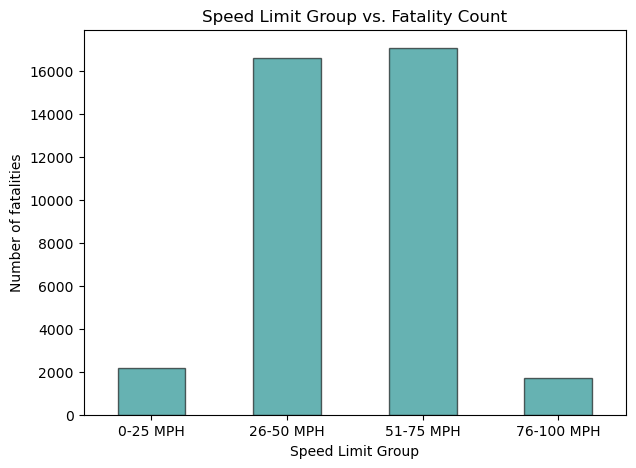

In [27]:
# Plotting bar graph. 
speed_limit_df.plot(kind="bar", rot = 0, figsize=(7,5), legend=False, 
                   title = "Speed Limit Group vs. Fatality Count",
                   xlabel = "Speed Limit Group", 
                   ylabel = "Number of fatalities", 
                   edgecolor ="black", 
                   color= "teal", 
                   alpha=0.6)
plt.show()

<b> Speed Limit Vs. Fatality Analysis (Part 2): <b>
    
As previously suggested, linear regression was not the best way to model speed limit vs fatality count. The above bar chart has grouped the speed limits into bins and suggests that most road fatalities occour in the range of 26-75 MPH. As an advisal Bragg's function regression (following a bell curve) shape would help with prediction rather than linear regression. However, in line with the summary statistics which were computed earlier in this study, a road fatality looks most likely to occour at 50MPH. 

<b> ANOVA test <b>

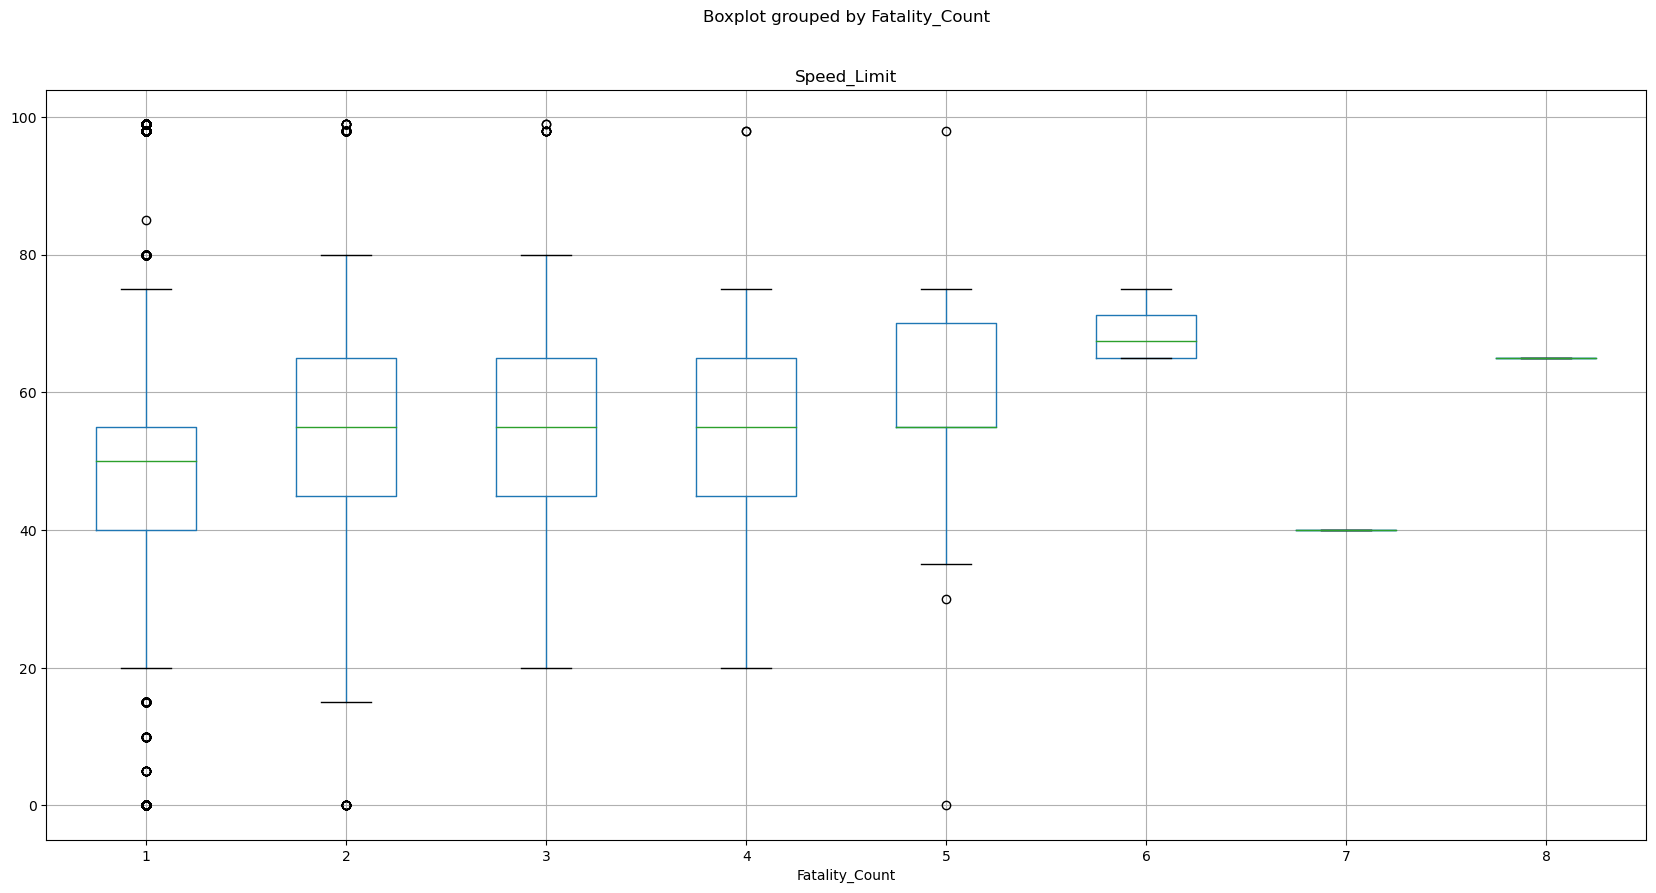

In [28]:
 # Create a boxplot to compare means 
speed_limit_df = Cleaned_df[["Speed_Limit", "Fatality_Count"]]
speed_limit_df.reset_index()
speed_limit_df.boxplot("Speed_Limit", by="Fatality_Count", figsize=(20, 10))
plt.show()

The box plot distribution suggests that the mean fatality count may increase up until a certain point with a increase in speed limit until a fatality count of above or equal to 7.

In [29]:
 # Extract individual groups
group1 = speed_limit_df[speed_limit_df["Fatality_Count"] == 1]["Speed_Limit"]
group2 = speed_limit_df[speed_limit_df["Fatality_Count"] == 2]["Speed_Limit"]
group3 = speed_limit_df[speed_limit_df["Fatality_Count"] == 3]["Speed_Limit"]
group4 = speed_limit_df[speed_limit_df["Fatality_Count"] == 4]["Speed_Limit"]
group5 = speed_limit_df[speed_limit_df["Fatality_Count"] == 5]["Speed_Limit"]
group6 = speed_limit_df[speed_limit_df["Fatality_Count"] == 6]["Speed_Limit"]
group7 = speed_limit_df[speed_limit_df["Fatality_Count"] == 7]["Speed_Limit"]
group8 = speed_limit_df[speed_limit_df["Fatality_Count"] == 8]["Speed_Limit"]

In [30]:
 # Perform the ANOVA
st.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8)

F_onewayResult(statistic=16.247319805638867, pvalue=1.6786914132905837e-21)

<b> Speed Limit Vs. Fatality Statistical Significance: <b>
    
From the performed Anova t-test, the pvalue is below the significance level of 0.05 and therefore, the null hypothesis could be rejected in line with the analysis outcomes which have been concluded.

## Visibility vs Fatality Count

Visability in the this study takes on the meaning of the range of vision/ clarity at the time the road incident took place.

In [32]:
# Creating a separate DataFrame to visualise the various visibilities and the number of fatalities which occured in each case.
visibility_df = Cleaned_df[["Visibility", "Fatality_Count"]]
visibility_df.reset_index()
visibility_df.head()

,Visibility,Fatality_Count
0,Dark - Not Lighted,3
1,Dark - Lighted,1
2,Daylight,1
3,Daylight,1
4,Dark - Not Lighted,1


In [33]:
# There are many types of visibility categories, this study will focus on the three with the highest frequency.
visibility_df["Visibility"].value_counts()

Daylight                   15920
Dark - Not Lighted          9619
Dark - Lighted              7303
Dusk                         934
Dawn                         630
Dark - Unknown Lighting      317
Reported as Unknown          152
Not Reported                  66
Other                         17
Name: Visibility, dtype: int64

In [34]:
# Narrowing down the DataFrame to only include records relating to the three visibility types of focus. 
visibility_df = visibility_df.loc[(visibility_df["Visibility"]=="Daylight") | 
                                  (visibility_df["Visibility"]=="Dark - Not Lighted") |
                                  (visibility_df["Visibility"]=="Dark - Lighted") 
                                  , :]

visibility_df["Visibility"].unique()

array(['Dark - Not Lighted', 'Dark - Lighted', 'Daylight'], dtype=object)

In [36]:
# Groups the visibility_df by the visibility type.
visibility_df = visibility_df.groupby(["Visibility"]).sum()
visibility_df = visibility_df.reset_index()
visibility_df

,Visibility,Fatality_Count
0,Dark - Lighted,7860
1,Dark - Not Lighted,10504
2,Daylight,17311


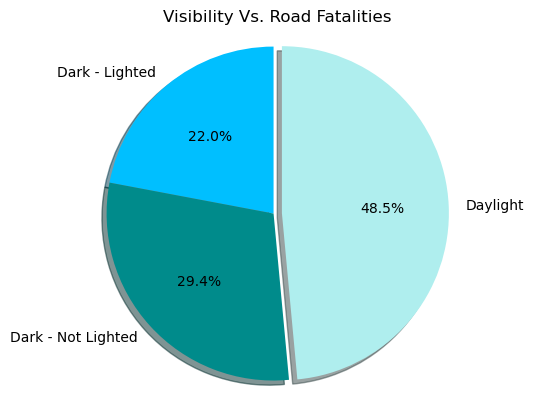

In [38]:
# Pie Plot.
colors = ["deepskyblue", "darkcyan", "paleturquoise"]
explode = (0, 0.00, 0.05)

plt.title("Visibility Vs. Road Fatalities")
plt.pie(visibility_df["Fatality_Count"], explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90, labels =visibility_df["Visibility"])
plt.axis("equal")
plt.show()

<b> Visibility Vs. Fatality Analysis: <b>
    
Out of three most frequently recorded types of visibilities: Daylight, Dark - Lighted, and Dark - Not Lighted. It is apparent that the most road fatalities have occoured within daylight. This makes sense as during daylight hours is when the majority of the population are using motor transport to commute to work, run school pickups, and other daily errands. During these daily obligations it is likely that people are not 100% focused on their driving and therefore more fatalities are recorded. 
    
It can also be seen that when just comparing the visibility in the dark, if the road if not lighted there is a higher chance of a fatality. Action which can be taken from this is to ensure that any roads which can be lit, are to help prevent unecessary fatalities. 

## One Sample T-Test (Further Exploration of California?)

To be able to capture if using a sample of our data filtered to the state of California (the state with the most road accidents) would help gather reliable insights, a T-test is performed. 

In [ ]:
# Creates a DataFrame to purely show the fatality counts for each road incident accross all US states. 
Fatality_df = Cleaned_df[["State", "Fatality_Count"]]
Fatality_df.head()

In [ ]:
# Population 1 will include all states.
population1 = Fatality_df
print(f" The mean fatality count accross all US states {round(population1.Fatality_Count.mean(),5)}")

# Population 2 will include just the state of California.
population2 = Fatality_df[Fatality_df["State"] == "California"]
print(f" The mean fatality count accross the US state of California {round(population2.Fatality_Count.mean(),5)}")

In [ ]:
# T-test against Population1 and Population2.
st.ttest_1samp(population2.Fatality_Count, population1.Fatality_Count.mean())

The t-test result helps show the significance between the population of the road incidents fatalities data and the sample which narrows down the fatality data to focus soley on the state of Califonia. 

The significance level considered is 0.05, the p-value obtained was 0.71 (2.d.p). Therefore there was not a significant difference in the measured means occuring due to chance. Further exploring the state of California would not support  the rejection of the null hypotheses explored in this study. 